In [8]:
# Importing packages
from torchvision import transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import resnet18
from torchvision.models import resnet18, resnet34

# Import ImageDataset
from dataloader import ImageDataset

# Importing training loop
from TrainingLoop import Optimization

# Import countries data
data = ImageDataset()

In [9]:

# Split data into train and test

torch.manual_seed(0xB00B1E5)

train_set, test_set, val_set = torch.utils.data.random_split(data, [0.8, 0.1, 0.1])

# Create loaders
batch_size = 8

trainloader = torch.utils.data.DataLoader(
    train_set,
    batch_size=batch_size,
    shuffle=True
)
testloader = torch.utils.data.DataLoader(
    test_set,
    batch_size=1,
    shuffle=False
)
valloader = torch.utils.data.DataLoader(
    val_set,
    batch_size=batch_size,
    shuffle=True
)


In [10]:
num_countries = 13
# Defining parameters 
num_epochs = 1
lr = 0.001

# device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

# binary cross entropy loss
loss_fn = nn.CrossEntropyLoss()
# model = resnet18(weights = "DEFAULT")
# model = model.to('cuda')
# model.fc = nn.Linear(512, num_countries)
model_name = '34_bs2_wd0_lr0.001_dropout-False'
models_folder = "models/"
# model = torch.load(models_folder + model_name + "/" + model_name)
batch_size = 2
weight_decay = 0
lr = 0.001
model_type = 34
num_epochs = 100

def append_dropout(model):
    names = list(model.named_children())
    for name, child in names:
        if isinstance(child, nn.ReLU):
            model.add_module(name + "_dropout", nn.Dropout(p=0.5))
        else:
            append_dropout(child)

if model_type == 18:
    model = resnet18()
else:
    model = resnet34()
# if 0:
#     append_dropout(model)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.CrossEntropyLoss()
model = model.to(device)
model.fc = nn.Linear(512, 13)
print(model.load_state_dict(torch.load(f'models/{model_name}/best_params.pt')))
# model.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)



device:  cuda
<All keys matched successfully>


In [11]:
optimization = Optimization(model, loss_fn, optimizer, device, 'test')
# optimization.train(trainloader, valloader, num_epochs)
# optimization.plot_losses()
# optimization.plot_accuracy()
# model.eval()

In [12]:
preds, vals, props = optimization.evaluate(testloader)

100
200
300
400
500


In [13]:
np.array(preds).shape

(585, 1)

In [14]:
np.mean(np.array(preds) == np.array(vals))
# 0.489010989010989

0.4581196581196581

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

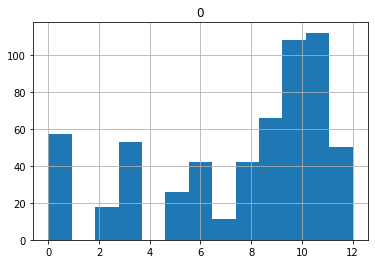

In [15]:
pd.DataFrame(preds).hist(bins=13)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

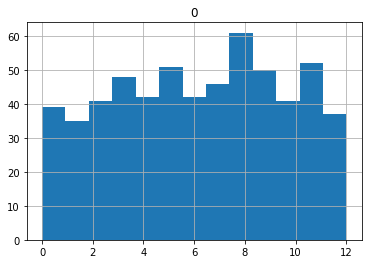

In [16]:
pd.DataFrame(vals).hist(bins=13)

In [17]:
import heatmap
mapping = {
    0: 'de',#'Germany',
    1: 'dk',#'Denmark',
    2: 'ee',#'Estonia',
    3: 'es',#'Spain',
    4: 'fr',#'France',
    5: 'gb',#'United Kingdom',
    6: 'gr',#'Greece',
    7: 'it',#'Italy',
    8: 'no',#'Norway',
    9: 'pl',#'Poland',
    10: 'ro',#'Romania',
    11: 'se',#'Sweden',
    12: 'ua',#'Ukraine',
}
def mapfunc(L):
    return [mapping[l] for l in L]

In [18]:
images = [i for i in iter(testloader)]

In [19]:
import matplotlib.pyplot as plt
def show_image(image):
    image = image.squeeze(0)
    image = image.permute(1, 2, 0)
    plt.imshow(image)
    plt.show()

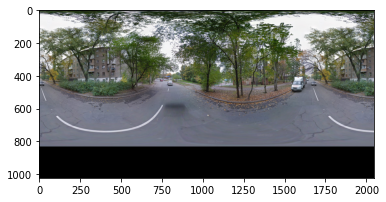

In [20]:
i = 4
show_image(images[i][0])
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1)

In [21]:
heatmap.heatmap(softmax(props[i])[0], vals[i][0])
print(f"Prediction: {mapping[preds[i][0]]}")
print(f"Ground truth: {mapping[vals[i][0]]}")
str = ", ".join(mapfunc(np.argsort(props[i][0])[::-1][0:3]))
print(f"Top 3: {str}")

c:\Users\MikkelBlæsbjerg\OneDrive - Aarhus universitet\Studie\Final semester\DeepLearning\GeoGuessrAI\heatmap.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["border_color"].iloc[truth] = "#EB4144"
c:\Users\MikkelBlæsbjerg\OneDrive - Aarhus universitet\Studie\Final semester\DeepLearning\GeoGuessrAI\heatmap.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["border_width"].iloc[truth] = 2


Prediction: ua
Ground truth: ua
Top 3: ua, pl, de


In [22]:
top3 = np.argsort(np.array(props))[:, :, -3:]

In [23]:
top3_accuracy = np.mean(np.any(top3 == np.array(vals)[:, None], axis=2))

In [24]:
top3_accuracy

0.7247863247863248